In [1]:
from tsai.all import (
    TSNormalize,
    TSToPlot,
    TSToMat,
    TSToGADF,
    TSToGASF,
    TSToMTF,
    TSToRP,
    TSToJRP,
    TSDatasets,
    TSDataLoaders,
    TSStandardScaler,
    plt,
)

from tsai.basics import (
    get_forecasting_splits,
    prepare_forecasting_data
)

from pathlib import Path
import pandas as pd
import sklearn


In [4]:
file_path = Path("../data/example_data.hd5")
df = pd.read_hdf(file_path)
df = df.reset_index()
df

,PropertyID,DateTime,Value
0,300468,2020-01-01 00:00:00,65.992325
1,300468,2020-01-01 00:00:30,59.085239
2,300468,2020-01-01 00:01:00,63.399876
3,300468,2020-01-01 00:01:30,74.437500
4,300468,2020-01-01 00:02:00,60.391750
...,...,...,...
17007,315036,2020-01-01 23:54:00,113.592300
17008,315036,2020-01-01 23:55:00,113.462090
17009,315036,2020-01-01 23:56:00,113.505493
17010,315036,2020-01-01 23:58:00,113.042534


In [5]:
df = df.pivot(index='DateTime', columns='PropertyID', values='Value')
df.columns = [str(col) for col in df.columns]
df = df.reset_index()
df.rename(columns={'DateTime':'date'}, inplace=True)
df = df.fillna(method='ffill')
df

,date,300468,300498,305256,315036,340686,341124,341550
0,2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
1,2020-01-01 00:00:30,59.085239,2036.845581,67.127098,114.388023,1.691197,5.378604,1.403499
2,2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
3,2020-01-01 00:01:30,74.437500,2036.780151,71.723625,114.293983,1.830390,5.459568,1.512679
4,2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172
...,...,...,...,...,...,...,...,...
2867,2020-01-01 23:57:30,91.004448,2031.101440,72.401321,113.505493,1.135774,1.400088,0.422443
2868,2020-01-01 23:58:00,88.076408,2030.877808,60.180309,113.042534,1.058243,1.402138,0.439101
2869,2020-01-01 23:58:30,84.573120,2030.877808,56.794193,113.042534,1.017935,1.406347,0.406799
2870,2020-01-01 23:59:00,59.298496,2030.950439,65.569916,113.122108,1.138036,1.426104,0.432213


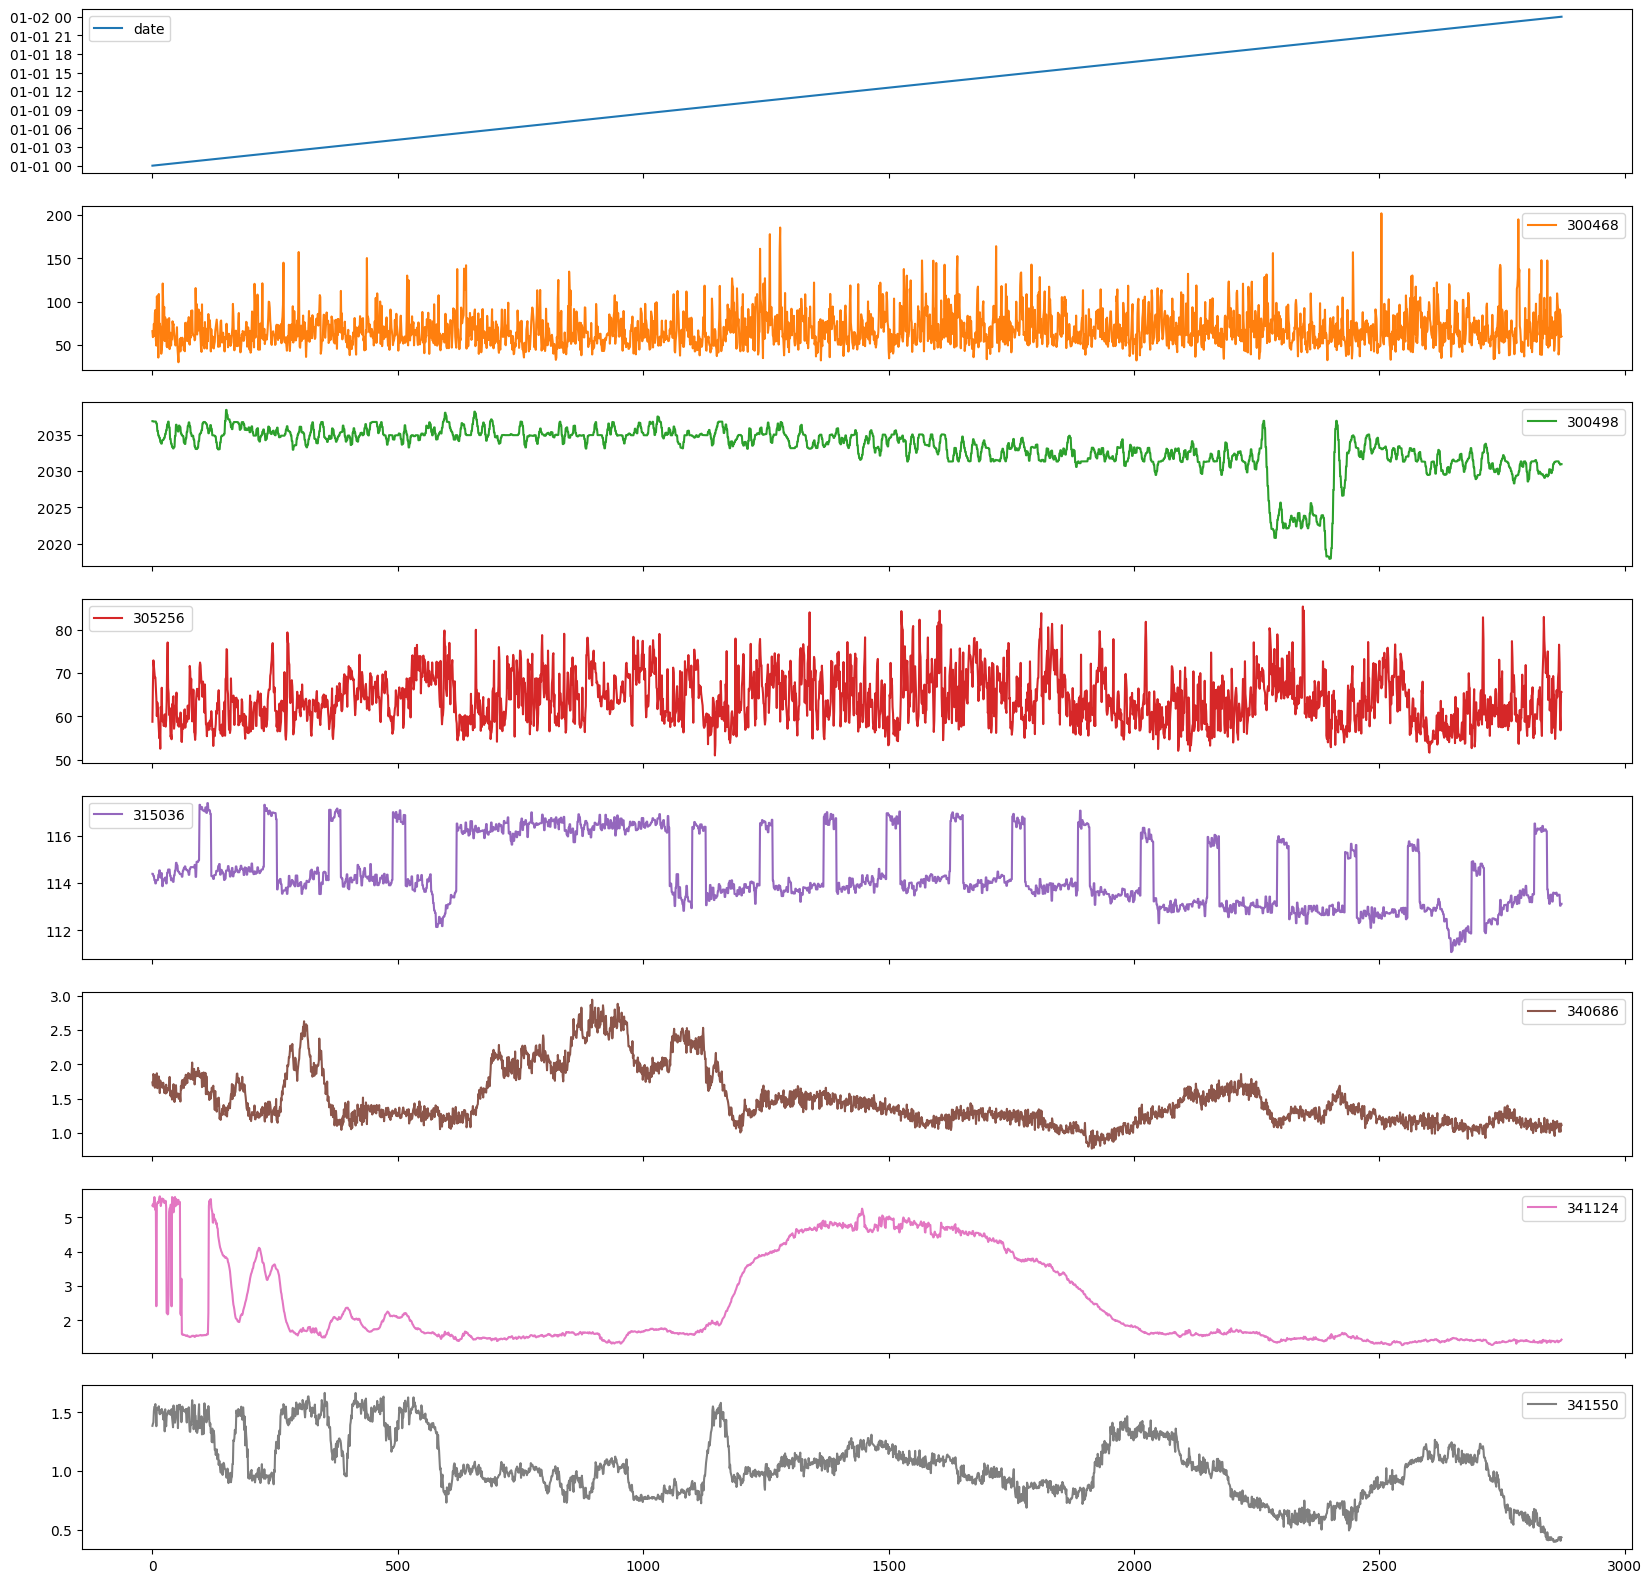

In [6]:
df.plot(subplots=True, figsize=(20, 20))
plt.show()

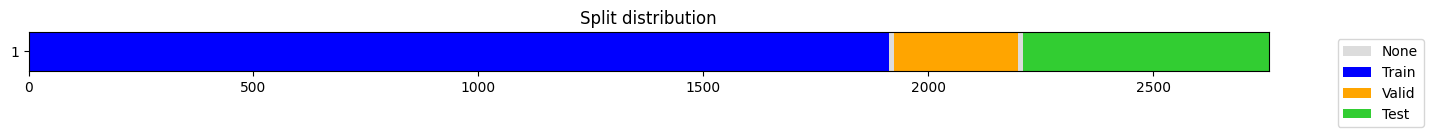

((#1914) [0,1,2,3,4,5,6,7,8,9...],
 (#274) [1925,1926,1927,1928,1929,1930,1931,1932,1933,1934...],
 (#547) [2210,2211,2212,2213,2214,2215,2216,2217,2218,2219...])

In [7]:
datetime_col = 'date'
steps_history = 104 # steps in the past
steps_future = 12 # steps in the future
valid_size = 0.1 # int or float indicating the size of the validation set
test_size = 0.2 # int or float indicating the size of the test set

splits = get_forecasting_splits(
    df, 
    fcst_history=steps_history, 
    fcst_horizon=steps_future, 
    datetime_col=datetime_col,
    valid_size=valid_size, 
    test_size=test_size
)
splits

In [8]:
columns = df.columns[1:]
train_split = splits[0]

# pipeline
exp_pipe = sklearn.pipeline.Pipeline(
    [
        ('scaler', TSStandardScaler(columns=columns)), # standardize data using train_split
    ], verbose=True)
# TODO: save the scaler for later use
df_scaled = exp_pipe.fit_transform(df, scaler__idxs=train_split)
df_scaled

[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


,date,300468,300498,305256,315036,340686,341124,341550
0,2020-01-01 00:00:00,-0.079886,1.647928,-1.038511,-0.415973,0.329507,1.790388,1.164852
1,2020-01-01 00:00:30,-0.433343,1.647928,0.410310,-0.415973,0.222734,1.817098,1.235562
2,2020-01-01 00:01:00,-0.212550,1.600665,1.422503,-0.488786,0.611125,1.765620,1.288360
3,2020-01-01 00:01:30,0.352279,1.600665,1.207903,-0.488786,0.540762,1.876692,1.686266
4,2020-01-01 00:02:00,-0.366485,1.600930,0.993672,-0.623206,0.310557,1.971923,1.832784
...,...,...,...,...,...,...,...,...
2867,2020-01-01 23:57:30,1.200061,-2.501351,1.325497,-1.099299,-1.046297,-1.111319,-2.814318
2868,2020-01-01 23:58:00,1.050224,-2.662891,-0.795102,-1.457759,-1.223440,-1.109810,-2.745552
2869,2020-01-01 23:58:30,0.870950,-2.662891,-1.382664,-1.457759,-1.315535,-1.106712,-2.878898
2870,2020-01-01 23:59:00,-0.422430,-2.610426,0.140106,-1.396147,-1.041129,-1.092169,-2.773987


In [9]:
x_vars = df.columns[1:]
y_vars = df.columns[1:]
X, y = prepare_forecasting_data(
    df_scaled, 
    fcst_history=steps_history, 
    fcst_horizon=steps_future, 
    x_vars=x_vars, 
    y_vars=y_vars
)
print(X.shape, "<-> (# samples, # features, # history timestamps) ")
print(y.shape, "<-> (# samples, # features, # future timestamps)")

(2757, 7, 104) <-> (# samples, # features, # history timestamps) 
(2757, 7, 12) <-> (# samples, # features, # future timestamps)




tfm: TSToPlot - batch shape: torch.Size([64, 3, 224, 224])


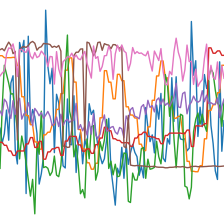



tfm: TSToMat - batch shape: torch.Size([64, 3, 224, 224])


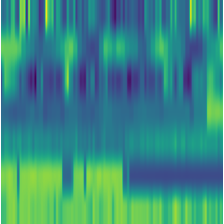



tfm: TSToGADF - batch shape: torch.Size([64, 7, 224, 224])


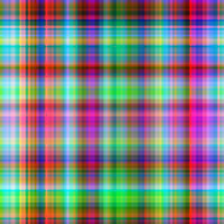



tfm: TSToGASF - batch shape: torch.Size([64, 7, 224, 224])


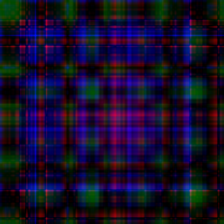



tfm: TSToMTF - batch shape: torch.Size([64, 7, 224, 224])


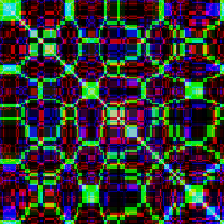



tfm: TSToRP - batch shape: torch.Size([64, 7, 224, 224])


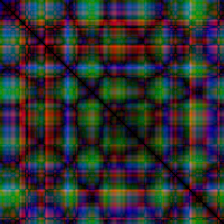

In [10]:
tfms = [None, None]
device = 'cuda'
batch_transforms = [
    [TSNormalize(), TSToPlot()], 
    [TSNormalize(), TSToMat(cmap='viridis')],
    [TSNormalize(), TSToGADF(cmap='spring')],
    [TSNormalize(), TSToGASF(cmap='summer')],
    [TSNormalize(), TSToMTF(cmap='autumn')],
    [TSNormalize(), TSToRP(cmap='winter')],
]
batch_transform_names = ['Plot', 'Mat', 'GADF', 'GASF', 'MTF', 'RP']
for i, (bt, btn) in enumerate(zip(batch_transforms, batch_transform_names)):
    dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
    dls = TSDataLoaders.from_dsets(dsets.train,
                                   dsets.valid,
                                   bs=[64, 128],
                                   batch_tfms=bt,
                                   shuffle=False,
                                   device=device)
    xb, yb = dls.train.one_batch()
    print(f'\n\ntfm: TSTo{btn} - batch shape: {xb.shape}')
    xb[0].show()
    plt.show()